In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

1.Trích và mô tả đặc trưng SIFT: Trình bày đoạn code minh họa cho trích và mô tả đặc
trung SIFT; trình bày và giải thích cú pháp hàm, các thông số được sử dụng; thay đổi
giá trị các thông số nếu có và ghi nhận kết quả.
Link tham khảo:
https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
https://www.geeksforgeeks.org/sift-interest-point-detector-using-python-opencv/




In [2]:
#Hàm sift. detect() tìm điểm chính trong hình ảnh. Bạn có thể chuyển mặt nạ nếu bạn chỉ muốn tìm kiếm một phần của hình ảnh. 
# Mỗi điểm chính là một cấu trúc đặc biệt có nhiều thuộc tính như tọa độ (x, y), kích thước của vùng lân cận có ý nghĩa,
#  góc xác định hướng của nó, phản hồi chỉ định cường độ của điểm chính, v.v.


#Cú pháp:sift.detect(image, mask)
#Trong đó:
#image: Đây là ảnh đầu vào mà bạn muốn tìm kiếm các điểm đặc trưng SIFT. Thường là ảnh xám (grayscale).

#mask (tùy chọn): Đây là một mặt nạ tùy chọn chỉ định phần của ảnh mà bạn muốn thực hiện việc tìm kiếm các điểm đặc trưng. 
# Các điểm đặc trưng sẽ chỉ được tìm kiếm trong phần được xác định bởi mặt nạ này. Nếu không có mặt nạ được cung cấp (tức là None), việc tìm kiếm sẽ được thực hiện trên toàn bộ ảnh.

# Đọc ảnh đầu vào
img = cv.imread('panorama1.jpg')

# Chuyển ảnh sang ảnh xám
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
# Khởi tạo đối tượng SIFT
sift = cv.SIFT_create()

# Trích xuất các điểm đặc trưng SIFT ảnh xám trên phạm vi toàn ảnh
kp = sift.detect(gray, None)

# Vẽ các điểm đặc trưng lên ảnh
img_with_keypoints = cv.drawKeypoints(gray, kp, img)

# Lưu ảnh chứa các điểm đặc trưng
cv.imwrite('sift_keypoints.jpg', img_with_keypoints)

# Hiển thị subplot
plt.figure(figsize=(12, 6))

# Subplot 1: Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Ảnh chứa đặc trưng')
plt.axis('off')

# Subplot 2: Ảnh với các điểm đặc trưng và hướng của chúng
plt.subplot(1, 2, 2)
img_with_keypoints_and_orientation = cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv.cvtColor(img_with_keypoints_and_orientation, cv.COLOR_BGR2RGB))
plt.title('Ảnh với các điểm đặc trưng và hướng của chúng')
plt.axis('off')

plt.show()


NameError: name 'cv' is not defined

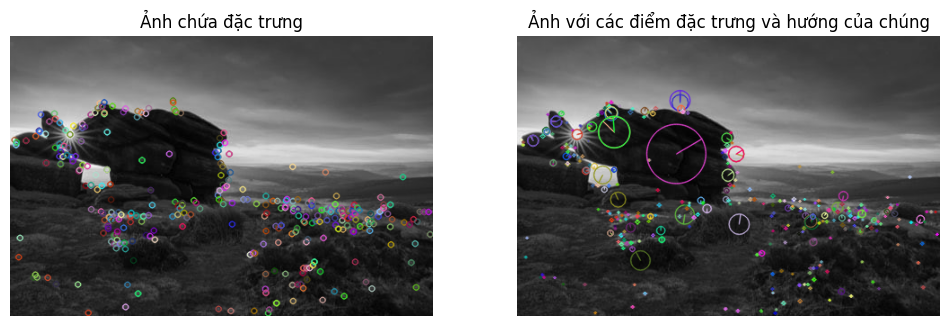

In [ ]:
 #Hàm này kết hợp cả việc tìm kiếm các điểm đặc trưng và tính toán các vector mô tả cho từng điểm đặc trưng. 
 # Kết quả của hàm này bao gồm cả danh sách các điểm đặc trưng và ma trận chứa các vector mô tả tương ứng với từng điểm đặc trưng. 
 # Điều này cung cấp thông tin chi tiết hơn về mỗi điểm đặc trưng, bao gồm cả thông tin về hướng và cường độ của nó.

img1 = cv.imread('panorama1.jpg')

# Chuyển ảnh sang ảnh xám
gray= cv.cvtColor(img1,cv.COLOR_BGR2GRAY)

# Khởi tạo đặc trưng SIFT
sift = cv.SIFT_create()

# Trích xuất các điểm đặc trưng SIFT bằng hàm detectAndCompute trên phạm vi toàn ảnh
kp1, des = sift.detectAndCompute(gray, None)

# Vẽ các điểm đặc trưng lên ảnh gốc
img_with_keypoints1 = cv.drawKeypoints(gray, kp1, img1)

# Lưu ảnh chứa các điểm đặc trưng
cv.imwrite('sift_keypoints1.jpg', img_with_keypoints1)

# Hiển thị subplot
plt.figure(figsize=(12, 6))

# Subplot 1: Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title('Ảnh chứa đặc trưng')
plt.axis('off')

# Subplot 2: Ảnh với các điểm đặc trưng và hướng của chúng
plt.subplot(1, 2, 2)
img_with_keypoints_and_orientation1 = cv.drawKeypoints(gray, kp1, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv.cvtColor(img_with_keypoints_and_orientation1, cv.COLOR_BGR2RGB))
plt.title('Ảnh với các điểm đặc trưng và hướng của chúng')
plt.axis('off')

plt.show()


2. So khớp đặc trưng OpenCV: Trình bày các giải thuật và các hàm hỗ trợ so khớp đặc
trưng trong OpenCV; trình bày và giải thích các hàm hỗ trợ của OpenCV cho việc so
khớp đặc trưng, giải thích ý nghĩa các thông số nếu có của các hàm; Viết các đoạn code
minh họa tương ứng sau khi trích và tính toán đặc trưng, thực hiện so khớp đặc trưng
giữa 2 ảnh.
Link tham khảo:
https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html
https://www.geeksforgeeks.org/feature-matching-using-brute-force-in-opencv/
https://www.geeksforgeeks.org/feature-matching-using-orb-algorithm-in-pythonopencv/
https://www.tutorialspoint.com/opencv-python-implementing-feature-matchingbetween-two-images-using-sift

Brute-Force Matcher (BFMatcher): Là phương pháp đơn giản nhất để so khớp đặc trưng giữa hai tập hợp đặc trưng.
Sử dụng hàm cv2.BFMatcher() để khởi tạo đối tượng matcher.
Các thông số chính:
cv2.NORM_L1 hoặc cv2.NORM_L2: Loại chuẩn được sử dụng để tính khoảng cách giữa các vector đặc trưng. Đối với các bộ mô tả dựa trên chuỗi nhị phân như ORB, BRIEF, BRISK, v.v., nên sử dụng cv.NORM_HAMMING , sử dụng khoảng cách Hamming làm phép đo. Nếu ORB đang sử dụng WTA_K == 3 hoặc 4 thì nên sử dụng cv.NORM_HAMMING2 .
crossCheck: Xác định xem liệu một điểm đặc trưng trong ảnh đầu tiên có tìm thấy một điểm khớp trong ảnh thứ hai hay không.

ORB (Oriented FAST and Rotated BRIEF):Là một thuật toán đặc trưng và so khớp nhanh chóng và hiệu quả.
Sử dụng hàm cv2.ORB_create() để khởi tạo đối tượng ORB detector.
Các thông số quan trọng:
nfeatures: Số lượng điểm đặc trưng tối đa cần tìm.
scoreType: Loại hàm tính điểm để sắp xếp các điểm đặc trưng.
WTA_K: Số lượng bit tối đa được chọn từ tập các phản ứng để tạo ra mô tả.


SIFT (Scale-Invariant Feature Transform):là một thuật toán mạnh mẽ để phát hiện và mô tả các điểm đặc trưng.
Sử dụng hàm cv2.SIFT_create() để khởi tạo đối tượng SIFT detector.
Các thông số quan trọng:
contrastThreshold: Ngưỡng cường độ để lọc các điểm đặc trưng.
edgeThreshold: Ngưỡng cạnh để lọc các điểm đặc trưng trên các cạnh.
sigma: Độ lớn của Gaussian blur để tính toán đạo hàm.

ORB (Oriented FAST and Rotated BRIEF):

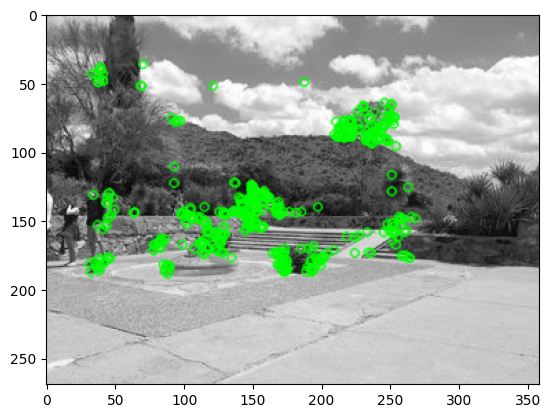

(<matplotlib.image.AxesImage at 0x1dfdf63b1d0>, None)

In [ ]:

img1 = cv2.imread('panorama4.jpg', cv2.IMREAD_GRAYSCALE) # queryImage
 
# Initiate ORB detector
orb = cv2.ORB_create()
 
# find the keypoints with ORB
kp = orb.detect(img1,None)
 
# compute the descriptors with ORB
kp, des = orb.compute(img1, kp)
 
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img1, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

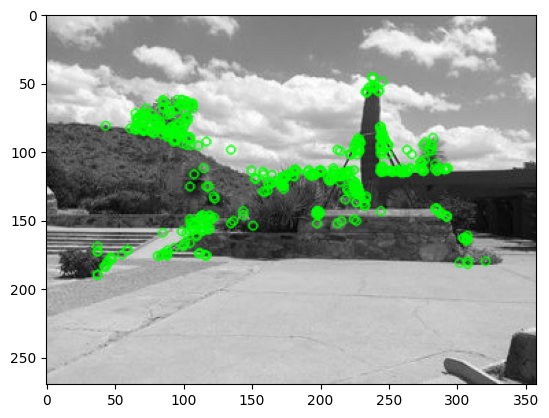

(<matplotlib.image.AxesImage at 0x1dfdf639610>, None)

In [ ]:

img1 = cv2.imread('panorama5.jpg', cv2.IMREAD_GRAYSCALE) # queryImage
 
# Initiate ORB detector
orb = cv2.ORB_create()
 
# find the keypoints with ORB
kp = orb.detectAndCompute(img1,None)
 
# compute the descriptors with ORB
kp, des = orb.compute(img1, kp)
 
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img1, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

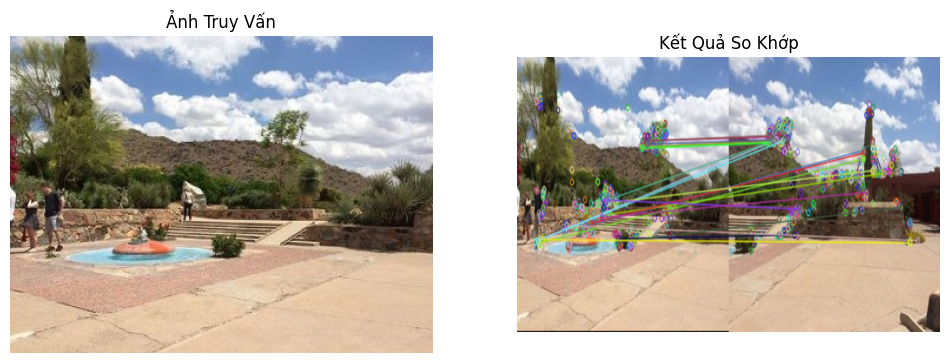

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh truy vấn và ảnh huấn luyện
query_img = cv2.imread('panorama4.jpg')
train_img = cv2.imread('panorama5.jpg')
 
# Chuyển đổi ảnh sang ảnh grayscale
query_img_bw = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
 
# Khởi tạo thuật toán ORB detector
orb = cv2.ORB_create()
 
# Phát hiện các điểm keypoint và tính toán các mô tả cho ảnh truy vấn và ảnh huấn luyện
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw, None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw, None)

# Khởi tạo Matcher để so khớp các keypoint và sau đó so khớp chúng
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors, trainDescriptors)
 
# Vẽ các kết quả khớp lên ảnh cuối cùng
final_img = cv2.drawMatches(query_img, queryKeypoints, 
                            train_img, trainKeypoints, matches[:20], None)

# Thay đổi kích thước ảnh cuối cùng để hiển thị tốt hơn
final_img = cv2.resize(final_img, (1000, 650))

# Chuyển đổi ảnh từ không gian màu BGR sang RGB (OpenCV sử dụng định dạng BGR)
final_img_rgb = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)

# Tạo subplot để hiển thị ảnh
plt.figure(figsize=(12, 6))

# Subplot 1: Ảnh truy vấn gốc
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB))
plt.title('Ảnh Truy Vấn')
plt.axis('off')

# Subplot 2: Ảnh cuối cùng có các keypoint trùng khớp giữa ảnh truy vấn và ảnh huấn luyện
plt.subplot(1, 2, 2)
plt.imshow(final_img_rgb)
plt.title('Kết Quả So Khớp')
plt.axis('off')

plt.show()


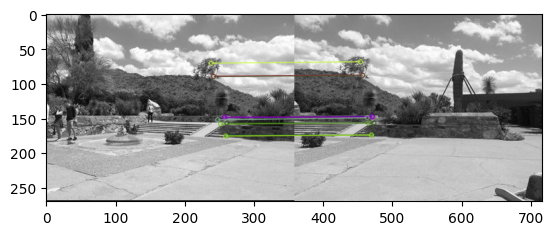

(<matplotlib.image.AxesImage at 0x1dfde7b0800>, None)

In [ ]:
#Kết hợp Brute-Force với bộ mô tả ORB


# Đọc ảnh và chuyển đổi sang ảnh xám
img1 = cv2.imread('panorama4.jpg', cv2.IMREAD_GRAYSCALE) # queryImage
img2 = cv2.imread('panorama5.jpg', cv2.IMREAD_GRAYSCALE) # trainImage

# Khởi động máy dò ORB
orb = cv2.ORB_create()

# Tìm keypoint và mô tả bằng ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Tạo BFMatcher object Vì ORB nên sài NORM_HAMMING
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sắp xếp chúng theo khoảng cách
matches = sorted(matches, key=lambda x: x.distance)

# Vẽ các điểm tương đồng đầu tiên
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Hiển thị ảnh
plt.imshow(img3), plt.show()


SIFT (Scale-Invariant Feature Transform)

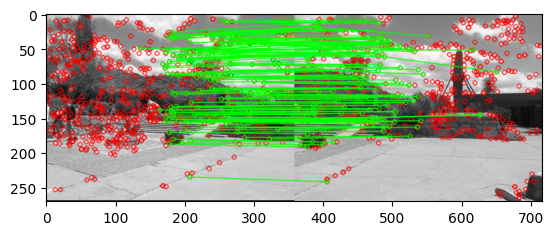

In [ ]:
#Trình so khớp dựa trên FLANN


import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển đổi sang ảnh xám
img1 = cv.imread('panorama4.jpg', cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('panorama5.jpg', cv.IMREAD_GRAYSCALE) # trainImage

# Khởi tạo máy dò SIFT
sift = cv.SIFT_create()

# Tìm các điểm keypoint và mô tả với SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Thiết lập các thông số cho matcher dựa trên FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50) # hoặc truyền vào từ điển trống

# Khởi tạo matcher dựa trên FLANN
flann = cv.FlannBasedMatcher(index_params, search_params)

# So khớp các descriptors
matches = flann.knnMatch(des1, des2, k=2)

# Tạo mask để chỉ vẽ các so khớp tốt
matchesMask = [[0, 0] for i in range(len(matches))]

# Áp dụng bộ lọc tỷ lệ như trong bài báo của Lowe
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

# Thiết lập các thông số cho việc vẽ các so khớp
draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_DEFAULT)

# Vẽ các so khớp lên ảnh
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

# Hiển thị ảnh kết quả
plt.imshow(img3)
plt.show()


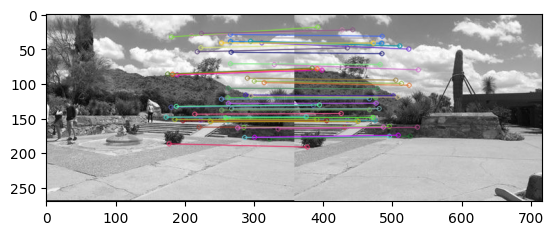

(<matplotlib.image.AxesImage at 0x29a58b09970>, None)

In [ ]:
# import các thư viện cần thiết
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Đọc hai ảnh đầu vào dưới dạng ảnh xám
img1 = cv2.imread('panorama4.jpg', 0)
img2 = cv2.imread('panorama5.jpg', 0)

# Khởi tạo đối tượng SIFT detector
sift = cv2.SIFT_create()

# Phát hiện và tính toán các điểm đặc trưng và vector mô tả cho ảnh 1 và 2
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Khởi tạo đối tượng BFMatcher
bf = cv2.BFMatcher()

# So khớp các vector mô tả.
matches = bf.match(des1, des2)

# Sắp xếp các kết quả khớp dựa trên khoảng cách
matches = sorted(matches, key=lambda val: val.distance)

# Vẽ 50 kết quả khớp đầu tiên
out = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

# Hiển thị ảnh kết quả
plt.imshow(out), plt.show()


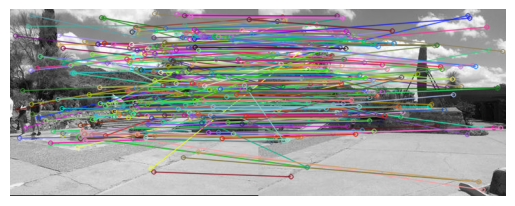

In [ ]:

#So khớp Brute-Force với bộ mô tả SIFT và kiểm tra tỷ lệ

import cv2
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển đổi sang ảnh xám
img1 = cv2.imread('panorama4.jpg', cv2.IMREAD_GRAYSCALE) # queryImage
img2 = cv2.imread('panorama5.jpg', cv2.IMREAD_GRAYSCALE) # trainImage

# Khởi động máy dò SIFT
sift = cv2.SIFT_create()

# Tìm keypoint và mô tả bằng SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher với tham số mặc định
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Áp dụng bước kiểm tra tỉ lệ
good = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good.append([m])

# Vẽ so khớp
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Hiển thị ảnh
plt.imshow(img3)
plt.axis('off')
plt.show()


3. Tạo ảnh toàn cảnh: (Panorama Stitching)
- Trình bày thuật toán tạo ảnh toàn cảnh của OpenCV (OpenCV’s Panorama Stitching
algorithm)
- Trình bày cú pháp các hàm được sử dụng cho quá trình tạo ảnh toàn cảnh và giải thích
các thông số tương ứng; Viết đoạn code minh họa cho việc tạo ảnh toàn cảnh từ các ảnh
chi tiết như ví dụ sau:

Link tham khảo:
https://datahacker.rs/005-how-to-create-a-panorama-image-using-opencv-withpython/
https://www.geeksforgeeks.org/opencv-panorama-stitching/
https://pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/

Thuật toán tạo ảnh toàn cảnh của OpenCV dựa trên việc sử dụng các bước sau:

    - Trích xuất điểm đặc trưng: Sử dụng một thuật toán như ORB (Oriented FAST and Rotated BRIEF) để trích xuất các điểm đặc trưng từ mỗi ảnh.
    - Matching điểm đặc trưng: Sử dụng một thuật toán như BFMatcher (Brute Force Matcher) để so khớp các điểm đặc trưng giữa các cặp ảnh.
    - Chọn các điểm khớp tốt: Lọc ra các điểm khớp tốt từ tất cả các điểm khớp sử dụng một ngưỡng.
    - Tính toán ma trận biến đổi (homography): Sử dụng các điểm khớp tốt để ước lượng ma trận biến đổi (homography) giữa các ảnh.
    - Biến đổi ảnh và gắn nối chúng: Sử dụng ma trận biến đổi để biến đổi các ảnh và gắn nối chúng lại với nhau để tạo thành ảnh toàn cảnh.


Cú pháp và giải thích các hàm trong quá trình tạo ảnh toàn cảnh:
    ORB_create: Tạo một đối tượng ORB để trích xuất các điểm đặc trưng.
        nfeatures: Số lượng điểm đặc trưng cần trích xuất.

    detectAndCompute: Phát hiện và tính toán các điểm đặc trưng và mô tả từ một ảnh.
    Cú pháp: keypoints, descriptors = orb.detectAndCompute(image, mask=None)
        image: Ảnh đầu vào.
        mask: Mặt nạ ảnh để chỉ định các vùng cụ thể để xem xét.
        keypoints: Danh sách các điểm đặc trưng được phát hiện.
        descriptors: Mô tả tương ứng cho mỗi điểm đặc trưng.

    BFMatcher_create: Tạo một đối tượng Brute Force Matcher để so khớp các điểm đặc trưng.
        cv2.NORM_HAMMING: Loại norm được sử dụng để so sánh các mô tả.

    knnMatch: Tìm các điểm khớp giữa hai tập hợp điểm đặc trưng.
    Cú pháp: matches = bf.knnMatch(descriptors1, descriptors2, k=2)
        descriptors1, descriptors2: Các mô tả của các điểm đặc trưng từ hai ảnh.
        k: Số lượng điểm khớp tốt nhất để tìm cho mỗi điểm trong mỗi ảnh.


    findHomography: Tìm ma trận biến đổi (homography) giữa hai tập hợp điểm đặc trưng.
    Cú pháp: M, mask = cv2.findHomography(src_points, dst_points, method=cv2.RANSAC, ransacReprojThreshold=3.0)
        src_points, dst_points: Các điểm đặc trưng từ ảnh nguồn và ảnh đích.
        method: Phương pháp ước lượng ma trận biến đổi (thường là RANSAC).
        ransacReprojThreshold: Ngưỡng cho phép khi sử dụng RANSAC.

    warpPerspective: Biến đổi ảnh sử dụng ma trận biến đổi (homography).
    Cú pháp: result = cv2.warpPerspective(img, M, (width, height))
        img: Ảnh cần biến đổi.
        M: Ma trận biến đổi (homography).
        (width, height): Kích thước của ảnh đầu ra.


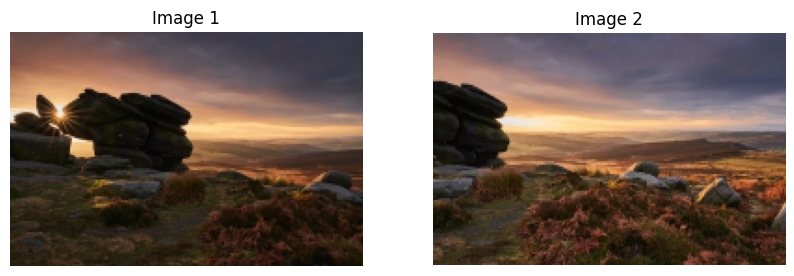

Ảnh toàn cảnh đã được tạo!!!


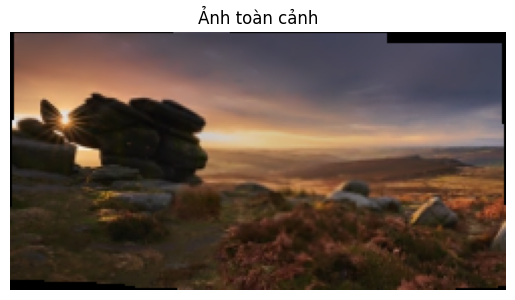

In [3]:
import cv2 
import matplotlib.pyplot as plt

image_paths = ['Panorama1.jpg', 'Panorama2.jpg'] 
imgs = [] 

for i in range(len(image_paths)): 
    imgs.append(cv2.imread(image_paths[i])) 
    imgs[i] = cv2.resize(imgs[i], (0, 0), fx=0.4, fy=0.4) 

# Hiển thị ảnh gốc và ảnh kết quả trong subplot
plt.figure(figsize=(10, 5))
for i in range(len(imgs)):
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1}')
    plt.axis('off')
plt.show()

# Tạo ảnh toàn cảnh
stitcher = cv2.Stitcher.create() 
status, output = stitcher.stitch(imgs) 

if status != cv2.STITCHER_OK: 
    print("Quá trình ghép ảnh không thành công") 
else: 
    print('Ảnh toàn cảnh đã được tạo!!!') 

# Hiển thị ảnh toàn cảnh
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Ảnh toàn cảnh')
plt.axis('off')
plt.show()


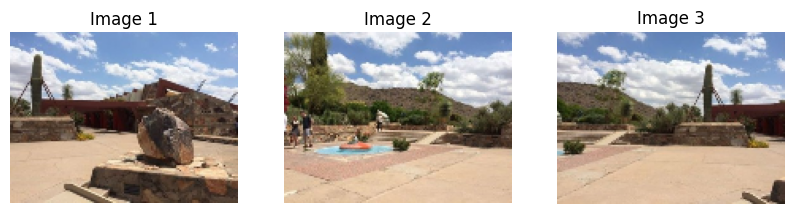

Ảnh toàn cảnh đã được tạo!!!


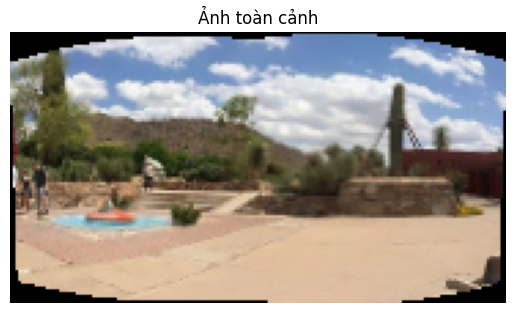

In [52]:
import cv2 
import matplotlib.pyplot as plt

image_paths = ['panorama3.jpg', 'panorama4.jpg','panorama5.jpg'] 
imgs = [] 

for i in range(len(image_paths)): 
    imgs.append(cv2.imread(image_paths[i])) 
    imgs[i] = cv2.resize(imgs[i], (0, 0), fx=0.4, fy=0.4) 

# Hiển thị ảnh gốc và ảnh kết quả trong subplot
plt.figure(figsize=(10, 5))
for i in range(len(imgs)):
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1}')
    plt.axis('off')
plt.show()

# Tạo ảnh toàn cảnh
stitcher = cv2.Stitcher.create() 
status, output = stitcher.stitch(imgs) 

if status != cv2.STITCHER_OK: 
    print("Quá trình ghép ảnh không thành công") 
else: 
    print('Ảnh toàn cảnh đã được tạo!!!') 

# Hiển thị ảnh toàn cảnh
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Ảnh toàn cảnh')
plt.axis('off')
plt.show()


Ảnh toàn cảnh đã được tạo!!!


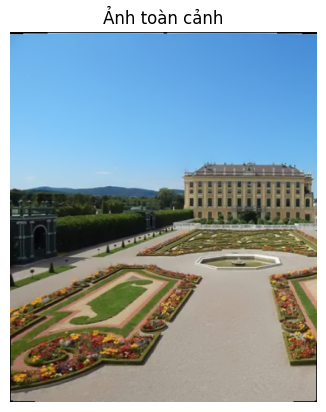

In [60]:
import cv2 
import matplotlib.pyplot as plt

image_paths = ['panorama7.png', 'panorama6.png'] 
imgs = [] 

for i in range(len(image_paths)): 
    imgs.append(cv2.imread(image_paths[i])) 

# Tạo ảnh toàn cảnh
stitcher = cv2.Stitcher.create() 
status, output = stitcher.stitch(imgs) 

if status != cv2.STITCHER_OK: 
    print("Quá trình ghép ảnh không thành công") 
else: 
    print('Ảnh toàn cảnh đã được tạo!!!') 

    # Lưu ảnh toàn cảnh
    cv2.imwrite('panorama_result.png', output)

    # Hiển thị ảnh toàn cảnh
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title('Ảnh toàn cảnh')
    plt.axis('off')
    plt.show()


In [63]:
import cv2
import matplotlib.pyplot as plt

def stitch_images(image_paths):
    # Đọc ảnh từ các đường dẫn
    images = [cv2.imread(path) for path in image_paths]

    # Tạo đối tượng Sticher
    stitcher = cv2.Stitcher.create()
    
    # Ghép ảnh
    status, stitched_image = stitcher.stitch(images)

    if status == cv2.STITCHER_OK:
        return stitched_image
    else:
        print("Quá trình ghép ảnh không thành công!")
        return None

# Danh sách các đường dẫn ảnh
image_paths = ['panorama_result.png', 'panorama8.png']

# Ghép ảnh
result_image = stitch_images(image_paths)

# Hiển thị ảnh kết quả
if result_image is not None:
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Ảnh kết quả')
    plt.axis('off')
    plt.show()


Quá trình ghép ảnh không thành công!
